# Machine Learning Online Class - Exercise 2: Logistic Regression

For this exercise, you will not need to change any code in this file,
or any other files other than those mentioned above.

In [1]:
# Initialization
from ex2func import *
from ex2funcReg import plotDecisionBoundary
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 9.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

## Part 1: Plotting
We start the exercise by first plotting the data to understand the
the problem we are working with.

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.



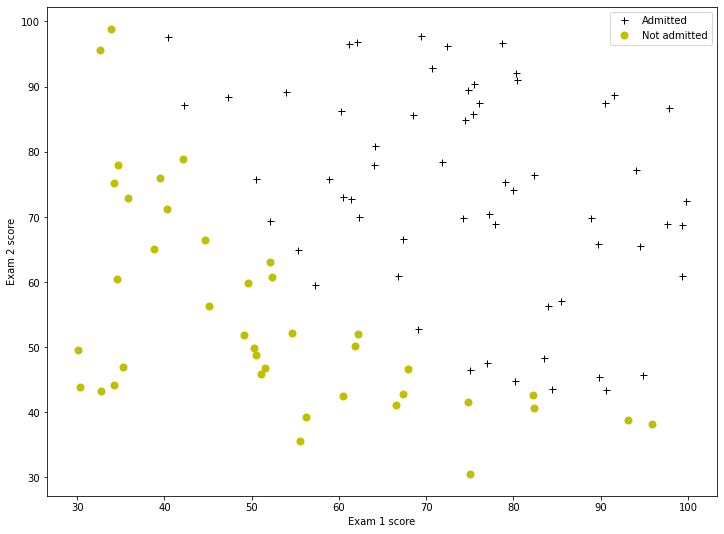

In [2]:
data=np.loadtxt('ex2data1.txt',delimiter=',')
X,y=data[:,[0,1]],data[:,2]
print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n')
plt.figure()
plotData(X,y)
plt.legend(['Admitted', 'Not admitted'])
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

## Part 2: Compute Cost and Gradient
In this part of the exercise, you will implement the cost and gradient
for logistic regression. You neeed to complete the code in
costFunction


In [3]:
#  Setup the data matrix appropriately, and add ones for the intercept term
(m, n) = X.shape

# Add intercept term to x and X_test
X=np.hstack((np.ones((m,1)),X))
# Initialize fitting parameters
initial_theta =np.zeros((n+1,))
# Compute and display initial cost and gradient
cost, grad = costFunction(initial_theta, X, y)
print('Cost at initial theta (zeros): %f\n' % cost)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros): \n')
print(grad)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')
# Compute and display cost and gradient with non-zero theta
test_theta = [-24, 0.2, 0.2]
cost, grad = costFunction(test_theta, X, y)

print('\nCost at test theta: %f\n'% cost)
print('Expected cost (approx): 0.218\n')
print('Gradient at test theta: \n')
print(grad)
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')

Cost at initial theta (zeros): 0.693147

Expected cost (approx): 0.693

Gradient at initial theta (zeros): 

[ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


Cost at test theta: 0.218330

Expected cost (approx): 0.218

Gradient at test theta: 

[0.04290299 2.56623412 2.64679737]
Expected gradients (approx):
 0.043
 2.566
 2.647



## Part 3: Optimizing using fminunc
In this exercise, you will use a built-in function (fminunc) to find the
optimal parameters theta.



Cost at theta found by fminunc: 0.203498

Expected cost (approx): 0.203

[-25.1613185    0.20623159   0.20147149]
Expected theta (approx):

 -25.161
 0.206
 0.201



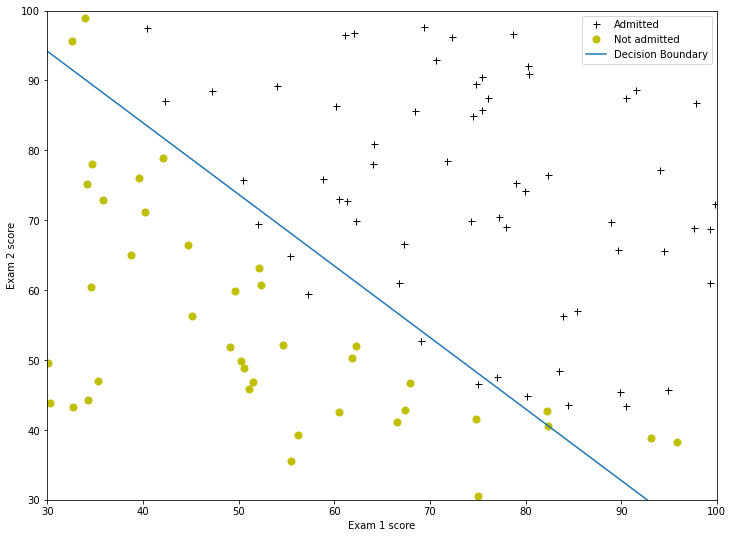

In [4]:
result=opt.minimize(fun=costfunc,x0=initial_theta,args=(X,y),method='TNC',jac=gradfunc)
theta,cost=result.x,result.fun
# Print theta to screen
print('Cost at theta found by fminunc: %f\n' % cost)
print('Expected cost (approx): 0.203\n')
print(theta)
print('Expected theta (approx):\n')
print(' -25.161\n 0.206\n 0.201\n')
# Plot Boundary
plt.figure()
plotDecisionBoundary(theta, X, y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

## Part 4: Predict and Accuracies
After learning the parameters, you'll like to use it to predict the outcomes
on unseen data. In this part, you will use the logistic regression model
to predict the probability that a student with score 45 on exam 1 and
score 85 on exam 2 will be admitted.

Furthermore, you will compute the training and test set accuracies of
our model.

Your task is to complete the code in predict

Predict probability for a student with score 45 on exam 1
and score 85 on exam 2




In [5]:
prob = sigmoid(np.array([1,45,85]).dot(theta))
print('For a student with scores 45 and 85, we predict an admission probability of %f\n' % prob)
print('Expected value: 0.775 +/- 0.002\n\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: %f\n' % (np.mean(p[:,0] == y) * 100,))
print('Expected accuracy (approx): 89.0\n');



For a student with scores 45 and 85, we predict an admission probability of 0.776291

Expected value: 0.775 +/- 0.002


Train Accuracy: 89.000000

Expected accuracy (approx): 89.0

